In [7]:
# Basic packages always been used
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
import tensorflow as tf
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7160466393419784015
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14328594432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5990086943368625752
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [5]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE
    
# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator
    
    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df=pd.read_csv('/content/drive/MyDrive/1112DL作業/NFLX_0608.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-08,358.059998,362.390015,356.250000,360.570007,360.570007,5225700
1,2018-06-11,361.880005,365.670013,360.910004,361.450012,361.450012,4432400
2,2018-06-12,363.600006,365.980011,362.000000,363.829987,363.829987,4291000
3,2018-06-13,367.529999,384.250000,364.109985,379.929993,379.929993,18222800
4,2018-06-14,384.269989,395.029999,383.250000,392.869995,392.869995,14598300
...,...,...,...,...,...,...,...
1253,2023-06-01,397.410004,407.519989,393.079987,403.130005,403.130005,7160100
1254,2023-06-02,402.890015,406.579987,395.899994,400.470001,400.470001,5897300
1255,2023-06-05,400.470001,413.859985,400.149994,403.540009,403.540009,7247400
1256,2023-06-06,405.000000,405.119995,396.929993,399.290009,399.290009,4991500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


# ***資料處理***

In [7]:
new_df=df.iloc[:,[0,4]].copy()
new_df.head()
#to datetime

,Date,Close
0,2018-06-08,360.570007
1,2018-06-11,361.450012
2,2018-06-12,363.829987
3,2018-06-13,379.929993
4,2018-06-14,392.869995


In [8]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Close   1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [9]:
new_df.describe().round(4)

,Close
count,1258.0000
mean,391.5083
std,116.7348
min,166.3700
25%,310.5150
50%,363.7400
75%,494.5575
max,691.6900


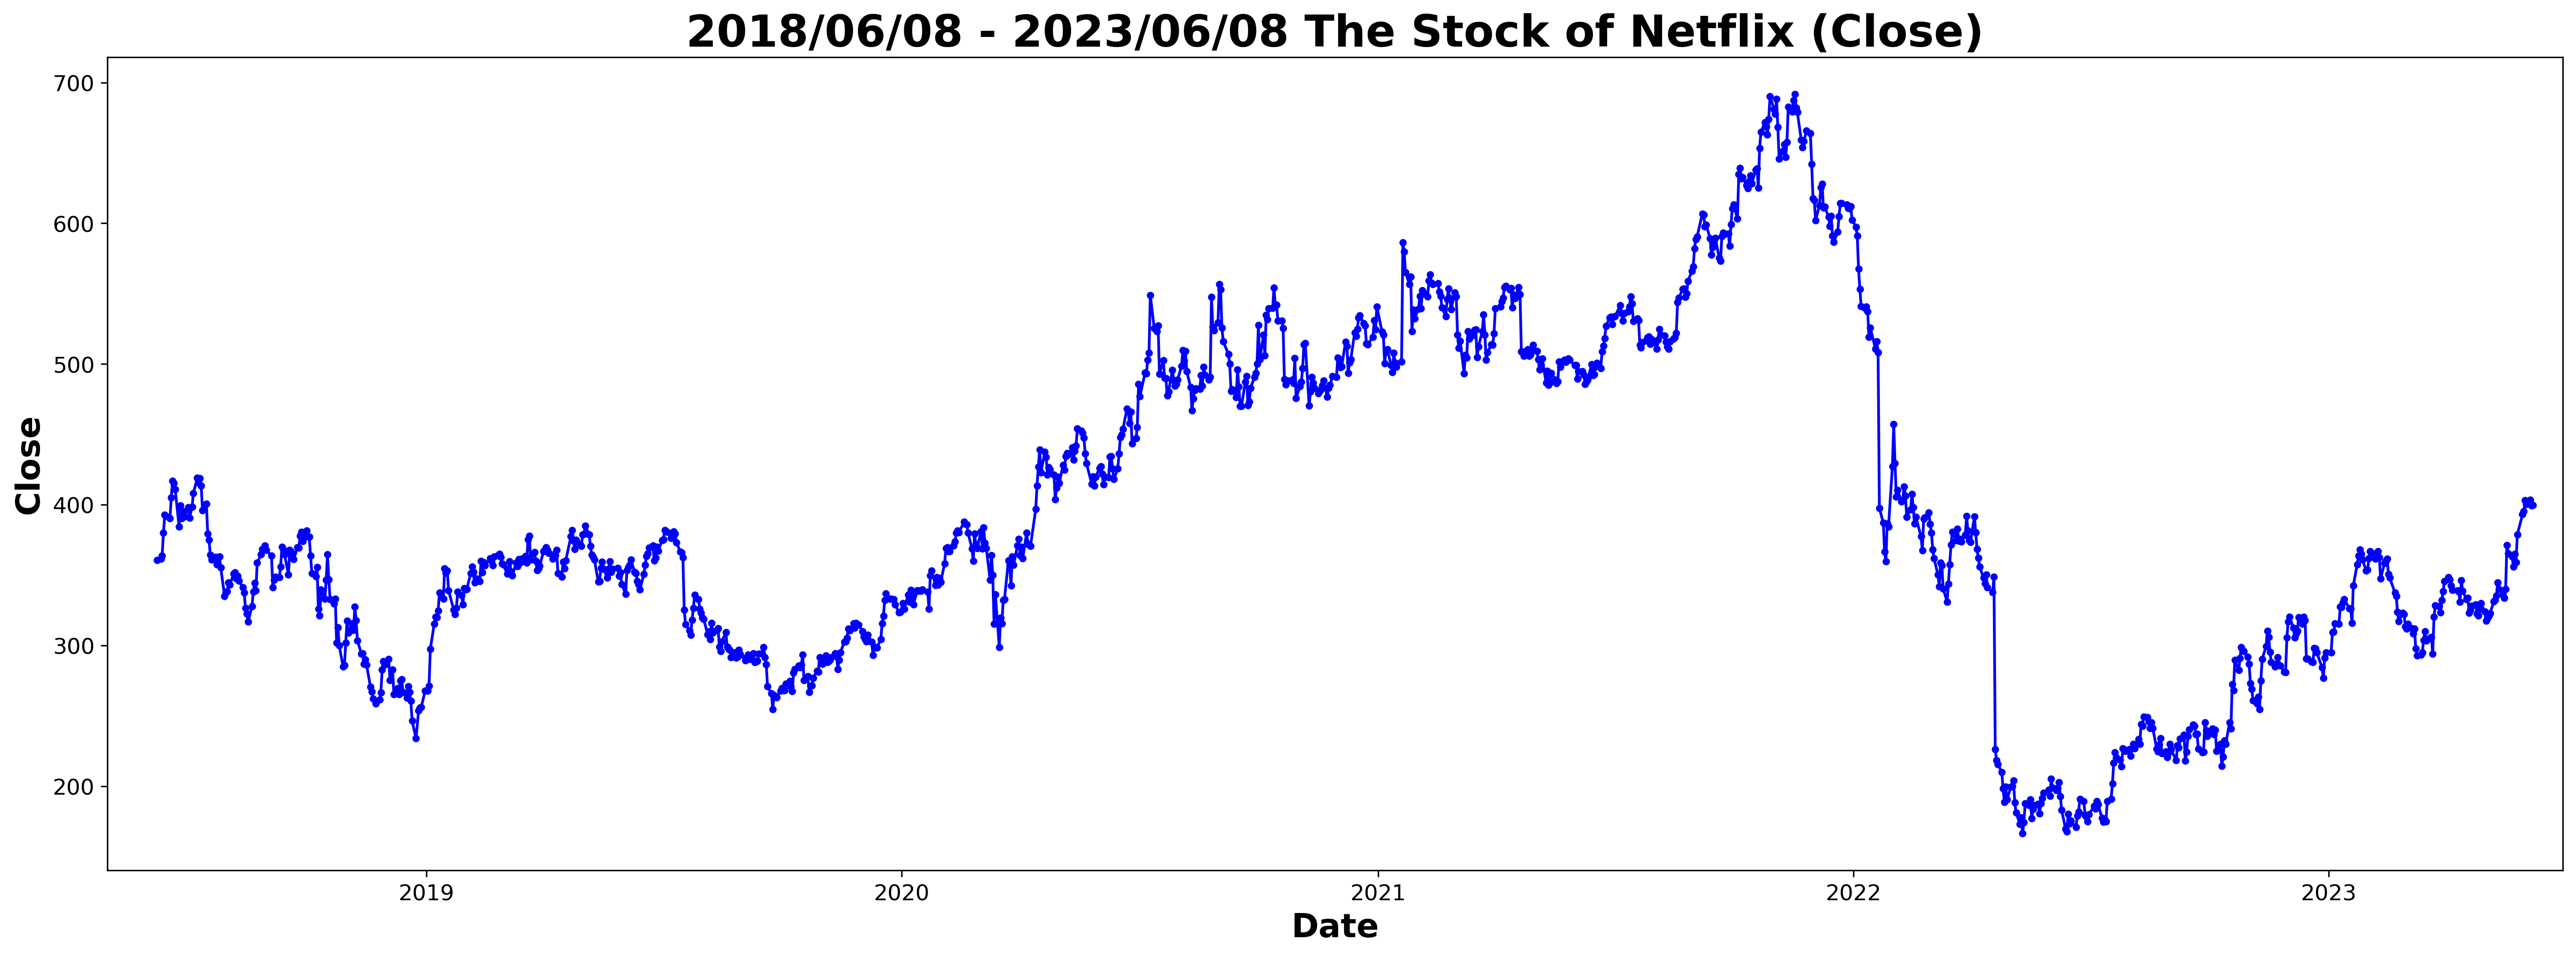

In [10]:
# Plot Y and its corresponding date
# Figure setting
plt.figure(figsize=(24,8),dpi=300)
plt.title('2018/06/08 - 2023/06/08 The Stock of Netflix (Close)',weight='bold',fontsize=24)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.ylabel('Close',fontsize=18,weight='bold')

# Actual by predicted plot
plt.plot(new_df['Date'],new_df['Close'],marker='.',color='blue')

# Set the axis
plt.xticks(fontsize=12)
plt.xlim([datetime.date(2018, 5, 1), datetime.date(2023, 6, 30)]) #針對x軸內容調整 （需要 import datetime）
#x.lim(時間前,時間後)
plt.yticks(fontsize=12)
plt.show()

# ***製造延遲***

In [11]:
new_df['close_Lag1']=new_df['Close'].shift(1).copy()
new_df['close_Lag2']=new_df['Close'].shift(2).copy()
new_df['close_Lag3']=new_df['Close'].shift(3).copy()
new_df

,Date,Close,close_Lag1,close_Lag2,close_Lag3
0,2018-06-08,360.570007,NaN,NaN,NaN
1,2018-06-11,361.450012,360.570007,NaN,NaN
2,2018-06-12,363.829987,361.450012,360.570007,NaN
3,2018-06-13,379.929993,363.829987,361.450012,360.570007
4,2018-06-14,392.869995,379.929993,363.829987,361.450012
...,...,...,...,...,...
1253,2023-06-01,403.130005,395.230011,392.980011,378.880005
1254,2023-06-02,400.470001,403.130005,395.230011,392.980011
1255,2023-06-05,403.540009,400.470001,403.130005,395.230011
1256,2023-06-06,399.290009,403.540009,400.470001,403.130005


In [12]:
clean_df=new_df.dropna(axis=0, how='any').copy() #deleting null row
clean_df=clean_df.reset_index(drop=True)
clean_df

,Date,Close,close_Lag1,close_Lag2,close_Lag3
0,2018-06-13,379.929993,363.829987,361.450012,360.570007
1,2018-06-14,392.869995,379.929993,363.829987,361.450012
2,2018-06-15,391.980011,392.869995,379.929993,363.829987
3,2018-06-18,390.399994,391.980011,392.869995,379.929993
4,2018-06-19,404.980011,390.399994,391.980011,392.869995
...,...,...,...,...,...
1250,2023-06-01,403.130005,395.230011,392.980011,378.880005
1251,2023-06-02,400.470001,403.130005,395.230011,392.980011
1252,2023-06-05,403.540009,400.470001,403.130005,395.230011
1253,2023-06-06,399.290009,403.540009,400.470001,403.130005


In [20]:
clean_df.to_csv('Netflix_Lags3_0612.csv',index=False, header=True)

# ***Training and Testing 切割 80/20***

In [9]:
clean_df = pd.read_csv('/content/drive/MyDrive/1112DL作業/Netflix_Lags3_0612.csv')

In [10]:
#df2 = pd.read_csv('/content/Netflix_Lags_3.csv')
#df2.round(2)
'''
Forecast_train_data=df2.iloc[0:846+1,:].copy()
Forecast_train_data
Forecast_test_data=df2.iloc[847:1004+1,:].copy()
Forecast_test_data
'''

'\nForecast_train_data=df2.iloc[0:846+1,:].copy()\nForecast_train_data\nForecast_test_data=df2.iloc[847:1004+1,:].copy()\nForecast_test_data\n'

In [11]:
split =int(0.8*clean_df.shape[0])
print('Training data:', split)
#Train,Test  = data[0:split] , data[split:]

Training data: 1004


In [12]:
Forecast_train_data, Forecast_test_data = clean_df[0:split], clean_df[split:]
#Forecast_train_data
#Forecast_test_data

In [13]:
Forecast_test_data = Forecast_test_data.reset_index(drop=True)
Forecast_test_data

,Date,Close,close_Lag1,close_Lag2,close_Lag3
0,2022-06-08,202.830002,198.610001,197.139999,198.979996
1,2022-06-09,192.770004,202.830002,198.610001,197.139999
2,2022-06-10,182.940002,192.770004,202.830002,198.610001
3,2022-06-13,169.690002,182.940002,192.770004,202.830002
4,2022-06-14,167.539993,169.690002,182.940002,192.770004
...,...,...,...,...,...
246,2023-06-01,403.130005,395.230011,392.980011,378.880005
247,2023-06-02,400.470001,403.130005,395.230011,392.980011
248,2023-06-05,403.540009,400.470001,403.130005,395.230011
249,2023-06-06,399.290009,403.540009,400.470001,403.130005


# ***Validation切割***

In [14]:
setV = int(len(Forecast_train_data) / 4)
setV

251

In [15]:
# Rolling 1
Rol_training_1=Forecast_train_data.iloc[0:250+1,:].copy()
Rol_val_1=Forecast_train_data.iloc[251:500+1,:].copy()

# Rolling 2
Rol_training_2=Forecast_train_data.iloc[251:500+1,:].copy()
Rol_val_2=Forecast_train_data.iloc[501:751+1,:].copy()

# Rolling 3
Rol_training_3=Forecast_train_data.iloc[501:751+1,:].copy()
Rol_val_3=Forecast_train_data.iloc[752:1002+1,:].copy()

In [171]:
'''
#set x (make prediction)
# Train
x_train=Rol_training_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['close_Lag1','close_Lag2','close_Lag3']

# Validation
x_val=Rol_val_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['close_Lag1','close_Lag2','close_Lag3']

#set y (want to predict)
y_train=Rol_training_1['Close'].copy()
y_val=Rol_val_1['Close'].copy()
'''
'''
#Rolling 2
#set x (make prediction)
# Train
x_train=Rol_training_2.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['close_Lag1','close_Lag2','close_Lag3']

# Validation
x_val=Rol_val_2.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['close_Lag1','close_Lag2','close_Lag3']

#set y (want to predict)
y_train=Rol_training_2['Close'].copy()
y_val=Rol_val_2['Close'].copy()
'''

#set x (make prediction) Rolling 3
# Train
x_train=Rol_training_3.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['close_Lag1','close_Lag2','close_Lag3']

# Validation
x_val=Rol_val_3.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['close_Lag1','close_Lag2','close_Lag3']

#set y (want to predict)
y_train=Rol_training_3['Close'].copy()
y_val=Rol_val_3['Close'].copy()


# ***NET 建立***

In [36]:
from keras.losses import mse
from keras.backend import sqrt

def my_RMSE(y_true, y_pred):
    return sqrt(mse(y_true, y_pred))

# Register custom object
#from keras.utils.generic_utils import get_custom_objects for pc
from tensorflow.keras.saving import get_custom_objects
get_custom_objects().update({'my_RMSE': my_RMSE})

In [18]:
# Some self define functions for building deep neural networks
def dense_generator(model_name,layers,last_layer_neurons,activation_fun='relu'):
    n=last_layer_neurons
    neurons=n
    for i in range(0,layers):
        neurons=neurons*2
        model_name.add(Dense(units=neurons, activation=activation_fun))

In [196]:
#--------------------------------------------------
# Create the model
clear.clear_session()
model=Sequential()

# Add input layer & first hidden layer------------------- close_lags 1-3
model.add(Dense(units=6, input_dim=3, activation='relu'))

'''
model.add(Dense(units=12, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=24, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=48, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=192, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=384, activation='linear'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=768, activation='linear'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1536, activation='linear'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=3072, activation='linear'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=6144, activation='linear'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=12288, activation='linear'))
model.add(Dropout(rate=0.2))
'''

model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=24, activation='relu'))
model.add(Dense(units=48, activation='relu'))
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=192, activation='linear'))
model.add(Dense(units=384, activation='linear'))
model.add(Dense(units=768, activation='linear'))
model.add(Dense(units=1536, activation='linear'))
model.add(Dense(units=3072, activation='linear'))
model.add(Dropout(rate=0.25))



# Add output softmax layer----------------------
model.add(Dense(units=1, activation='linear'))

# Compile the defined Net
opt=Adam(learning_rate=0.001,beta_1=0.5)
#改成rmse
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dense_4 (Dense)             (None, 96)                4704      
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_5 (Dense)             (None, 192)               1

In [197]:
# 7.1 Store in the history for more useful information
history=model.fit(scaled_x_train, y_train, epochs=300, batch_size=64,verbose=1,validation_data=(scaled_x_val, y_val))

Epoch 1/300
4/4 [==============================] - 1s 79ms/step - loss: 502.8099 - mean_absolute_percentage_error: 99.0251 - val_loss: 415.8875 - val_mean_absolute_percentage_error: 85.5652
Epoch 2/300
4/4 [==============================] - 0s 19ms/step - loss: 260.8002 - mean_absolute_percentage_error: 51.4436 - val_loss: 108.4722 - val_mean_absolute_percentage_error: 23.2113
Epoch 3/300
4/4 [==============================] - 0s 16ms/step - loss: 113.3578 - mean_absolute_percentage_error: 22.2931 - val_loss: 65.7914 - val_mean_absolute_percentage_error: 19.1334
Epoch 4/300
4/4 [==============================] - 0s 15ms/step - loss: 82.1003 - mean_absolute_percentage_error: 16.1833 - val_loss: 246.6306 - val_mean_absolute_percentage_error: 64.8841
Epoch 5/300
4/4 [==============================] - 0s 16ms/step - loss: 86.1459 - mean_absolute_percentage_error: 16.9126 - val_loss: 63.6295 - val_mean_absolute_percentage_error: 21.5672
Epoch 6/300
4/4 [==============================] - 0s 

In [186]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

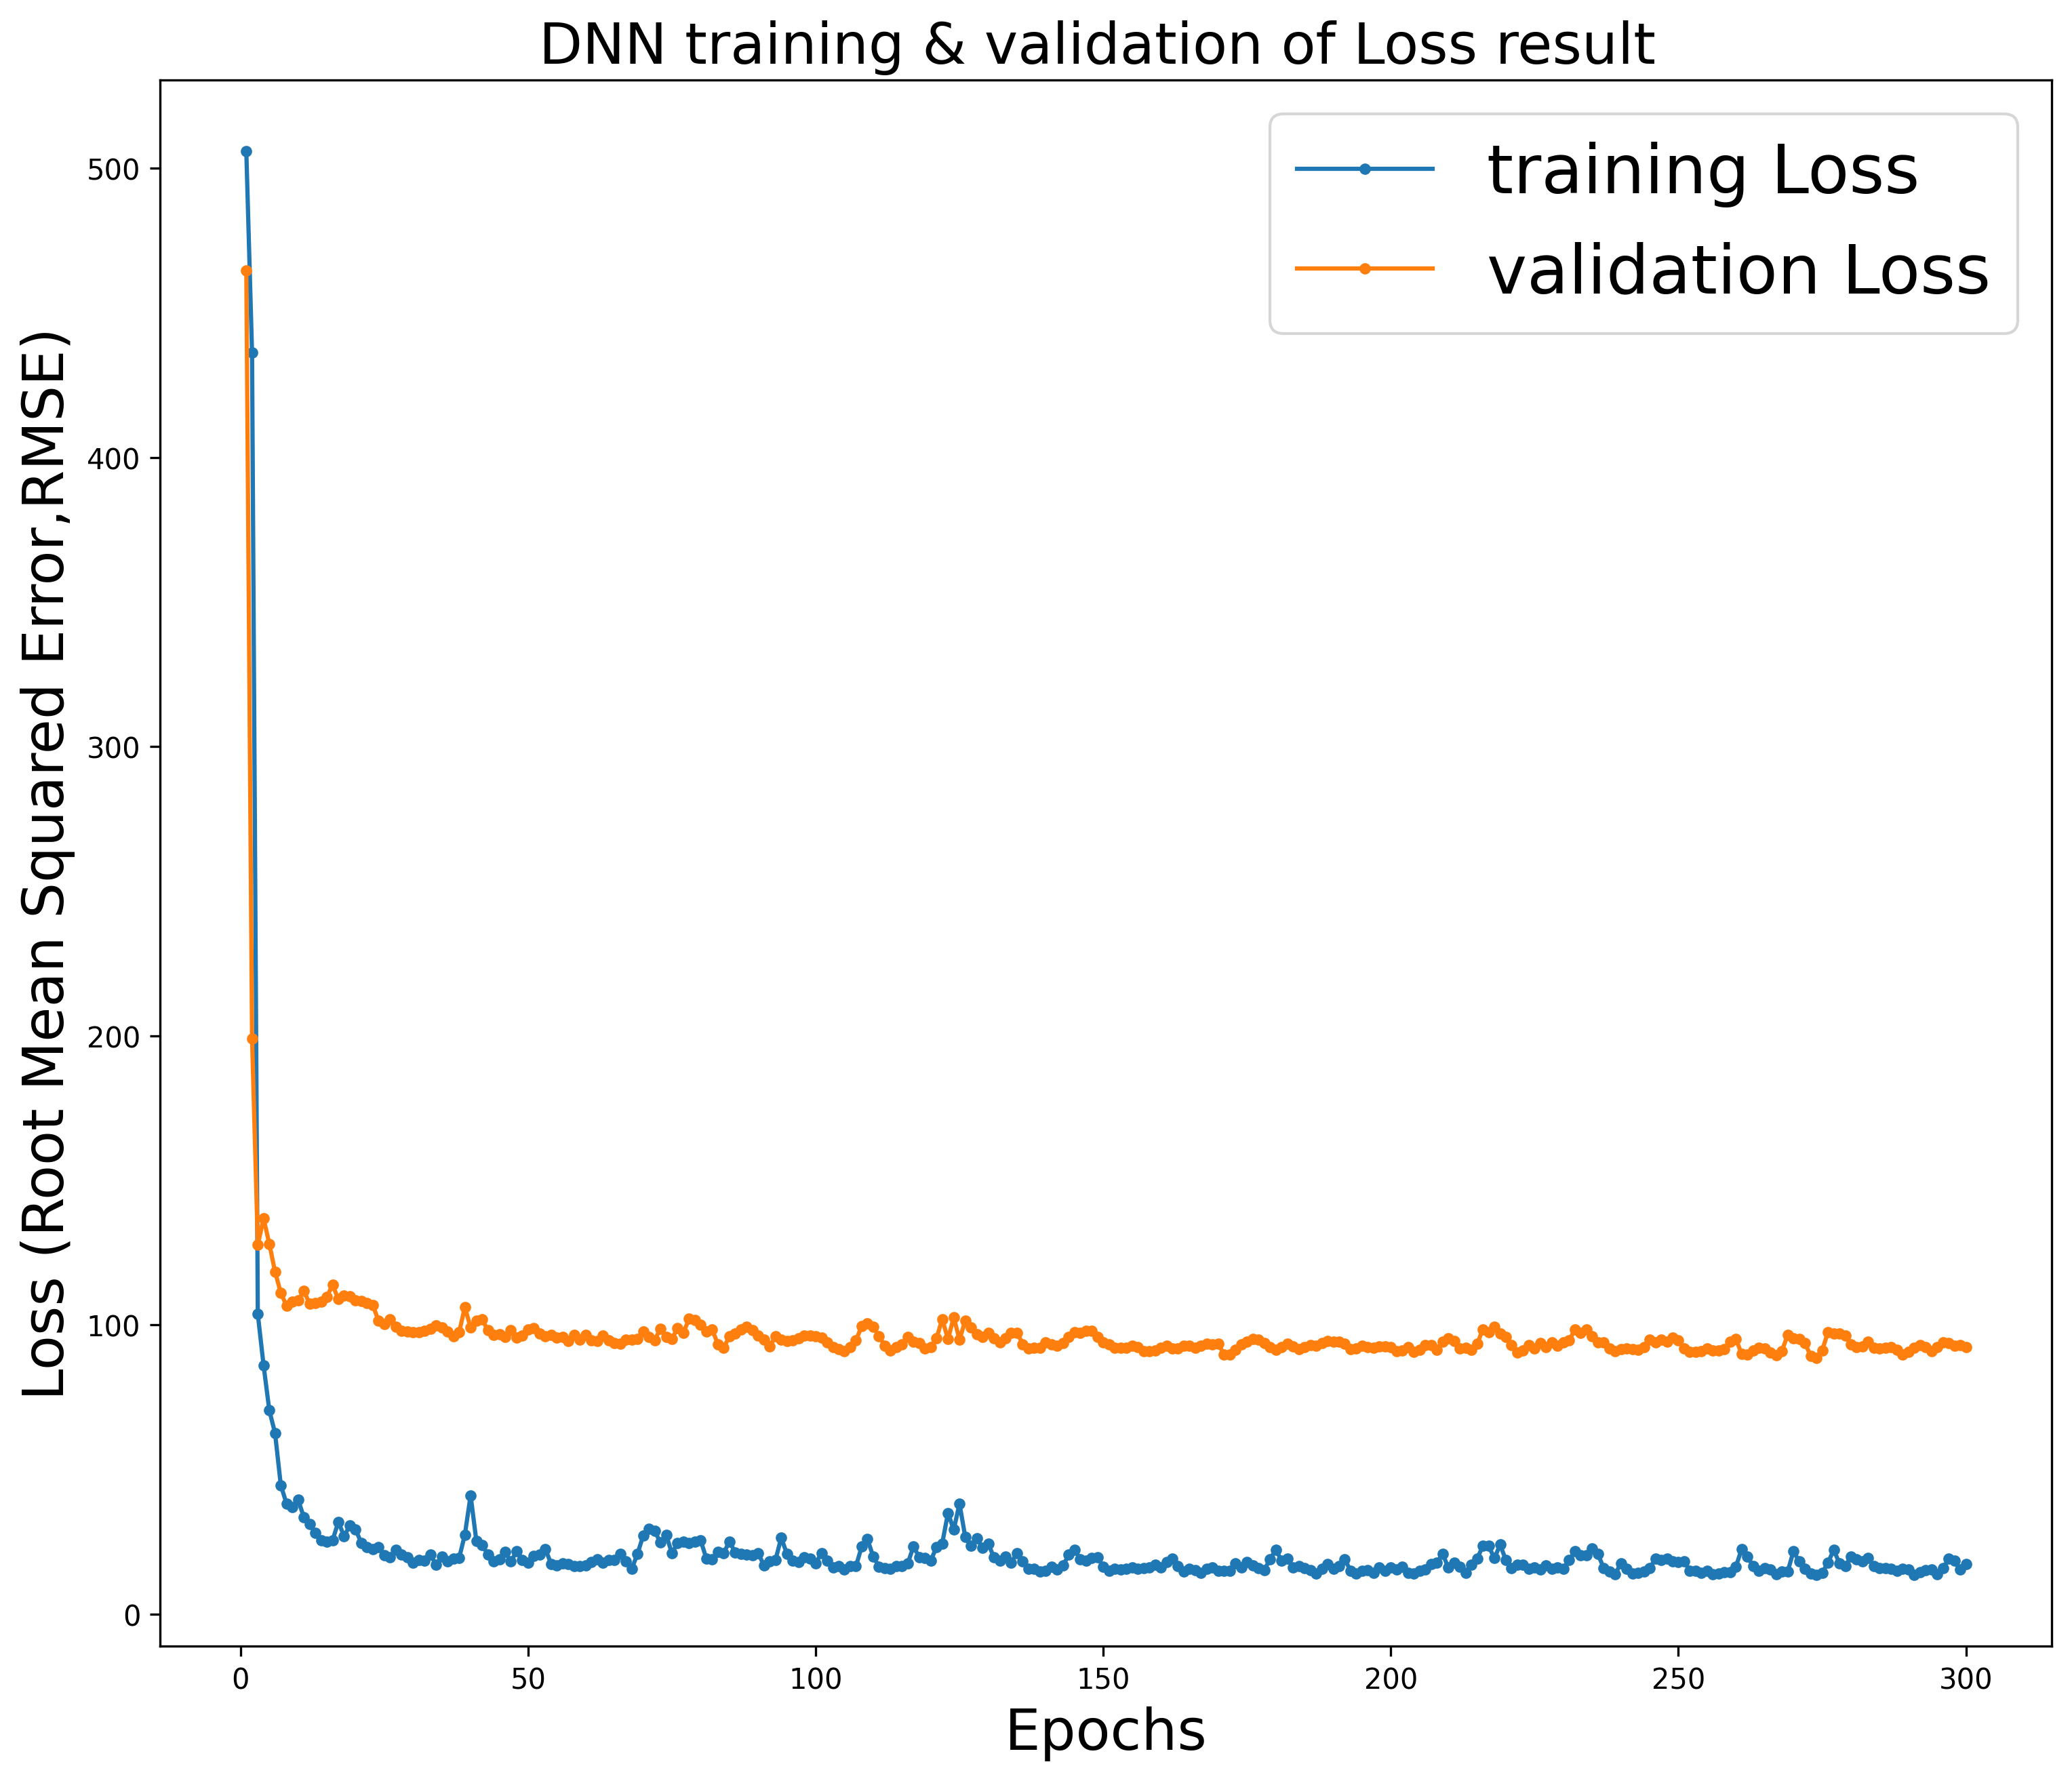

In [187]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

# ***Final Models***

In [188]:
# X all train data
x_forecast_train=Forecast_train_data.drop(['Date','Close'],axis=1).copy()
# Y all train data
y_forecast_train=Forecast_train_data['Close'].copy()

In [198]:
# Create the model
clear.clear_session()
Fmodel=Sequential()

# Add input layer & first hidden layer------------------- close_lags 1-3
Fmodel.add(Dense(units=6, input_dim=3, activation='relu'))

'''
Fmodel.add(Dense(units=12, activation='relu'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=24, activation='relu'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=48, activation='relu'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=96, activation='relu'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=192, activation='relu'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=384, activation='linear'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=768, activation='linear'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=1536, activation='linear'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=3072, activation='linear'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=6144, activation='linear'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=12288, activation='linear'))
Fmodel.add(Dropout(rate=0.2))
'''

Fmodel.add(Dense(units=12, activation='relu'))
Fmodel.add(Dense(units=48, activation='relu'))
Fmodel.add(Dense(units=24, activation='relu'))
Fmodel.add(Dense(units=96, activation='relu'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=192, activation='linear'))
Fmodel.add(Dense(units=384, activation='linear'))
Fmodel.add(Dense(units=768, activation='linear'))
Fmodel.add(Dense(units=1536, activation='linear'))
Fmodel.add(Dense(units=3072, activation='linear'))
Fmodel.add(Dropout(rate=0.25))



# Add output softmax layer----------------------
Fmodel.add(Dense(units=1, activation='linear'))

# Compile the defined Net
opt=Adam(learning_rate=0.001,beta_1=0.5)
#改成rmse
Fmodel.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
Fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 48)                624       
                                                                 
 dense_3 (Dense)             (None, 24)                1176      
                                                                 
 dense_4 (Dense)             (None, 96)                2400      
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_5 (Dense)             (None, 192)               1

In [199]:
history=Fmodel.fit(x_forecast_train, y_forecast_train, epochs=300, batch_size=64,verbose=1)

Epoch 1/300
16/16 [==============================] - 1s 7ms/step - loss: 213.5176 - mean_absolute_percentage_error: 51.4656
Epoch 2/300
16/16 [==============================] - 0s 5ms/step - loss: 129.1579 - mean_absolute_percentage_error: 30.7514
Epoch 3/300
16/16 [==============================] - 0s 5ms/step - loss: 88.5288 - mean_absolute_percentage_error: 21.4322
Epoch 4/300
16/16 [==============================] - 0s 5ms/step - loss: 96.4652 - mean_absolute_percentage_error: 22.9441
Epoch 5/300
16/16 [==============================] - 0s 6ms/step - loss: 87.9710 - mean_absolute_percentage_error: 21.1077
Epoch 6/300
16/16 [==============================] - 0s 5ms/step - loss: 66.1166 - mean_absolute_percentage_error: 15.8749
Epoch 7/300
16/16 [==============================] - 0s 5ms/step - loss: 68.7136 - mean_absolute_percentage_error: 16.5671
Epoch 8/300
16/16 [==============================] - 0s 5ms/step - loss: 67.3747 - mean_absolute_percentage_error: 16.1460
Epoch 9/300
16

In [200]:
#Fmodel.save('DNN_trained0613_model1.h5')
#Fmodel.save('DNN_trained0613_model2.h5')
Fmodel.save('DNN_trained0613_model3.h5')
print('Model has been saved...')

Model has been saved...
